In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Reading the csv file
data=pd.read_csv('data/cpdata.csv')
print(data.head(1))

#Creating dummy variable for target i.e label
label= pd.get_dummies(data.label).iloc[: , 1:]
data= pd.concat([data,label],axis=1)
data.drop('label', axis=1,inplace=True)
print('The data present in one row of the dataset is')
print(data.head(1))
train=data.iloc[:, 0:4].values
test=data.iloc[: ,4:].values

#Dividing the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Importing Decision Tree classifier
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()

#Fitting the classifier into training set
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
# Finding the accuracy of the model
a=accuracy_score(y_test,pred)
print("The accuracy of this model is: ", a*100)



   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
The data present in one row of the dataset is
   temperature   humidity        ph    rainfall  Black gram  Chickpea  \
0    20.879744  82.002744  6.502985  202.935536       False     False   

   Coconut  Coffee  Cotton  Ground Nut  ...  maize  mango  millet  muskmelon  \
0    False   False   False       False  ...  False  False   False      False   

   orange  papaya  pomegranate  rice  watermelon  wheat  
0   False   False        False  True       False  False  

[1 rows x 34 columns]
The accuracy of this model is:  90.43010752688173


In [3]:
data = pd.read_csv('data/cpdata.csv')
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
unique_labels = data['label'].unique()

In [5]:
print(unique_labels)

['rice' 'wheat' 'Mung Bean' 'Tea' 'millet' 'maize' 'Lentil' 'Jute'
 'Coffee' 'Cotton' 'Ground Nut' 'Peas' 'Rubber' 'Sugarcane' 'Tobacco'
 'Kidney Beans' 'Moth Beans' 'Coconut' 'Black gram' 'Adzuki Beans'
 'Pigeon Peas' 'Chickpea' 'banana' 'grapes' 'apple' 'mango' 'muskmelon'
 'orange' 'papaya' 'pomegranate' 'watermelon']


In [ ]:
#Using firebase to import data to be tested
!pip3 install python-firebase
!pip3 install firebase



  Preparing metadata (setup.py) ... done
  Created wheel for python-firebase: filename=python_firebase-1.2-py3-none-any.whl size=11514 sha256=8005a1602eb3a7941da97ae4ffaf86293178dd88e49132985a7c00d4d8e0402f
  Stored in directory: /root/.cache/pip/wheels/db/18/48/d842a2d76125ee48cc5e3f3afa3481412099fe5aa7e5c6c8f3
Successfully built python-firebase
The predicted crop is muskmelon


In [ ]:
from firebase import firebase
firebase =firebase.FirebaseApplication('https://cropit-eb156.firebaseio.com/')
tp=firebase.get('/Realtime',None)

ah=tp['Air Humidity']
atemp=tp['Air Temp']
shum=tp['Soil Humidity']
pH=tp['Soil pH']
rain=tp['Rainfall']


l=[]
l.append(ah)
l.append(atemp)
l.append(pH)
l.append(rain)
predictcrop=[l]

# Putting the names of crop in a single list
crops=['wheat','mungbean','Tea','millet','maize','lentil','jute','cofee','cotton','ground nut','peas','rubber','sugarcane','tobacco','kidney beans','moth beans','coconut','blackgram','adzuki beans','pigeon peas','chick peas','banana','grapes','apple','mango','muskmelon','orange','papaya','watermelon','pomegranate']
cr='rice'

#Predicting the crop
predictions = clf.predict(predictcrop)
count=0
for i in range(20,40):
    if(predictions[0][i]==1):
        c=crops[i]
        count=count+1
        break;
    i=i+1
if(count==0):
    print('The predicted crop is %s'%cr)
else:
    print('The predicted crop is %s'%c)

#Sending the predicted crop to database
cp=firebase.put('/croppredicted','crop',c)

The predicted crop is muskmelon


   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
The data present in one row of the dataset is
   temperature   humidity        ph    rainfall  Black gram  Chickpea  \
0    20.879744  82.002744  6.502985  202.935536           0         0   

   Coconut  Coffee  Cotton  Ground Nut  ...  maize  mango  millet  muskmelon  \
0        0       0       0           0  ...      0      0       0          0   

   orange  papaya  pomegranate  rice  watermelon  wheat  
0       0       0            0     1           0      0  

[1 rows x 34 columns]
The accuracy of Decision Classifie model is:  90.80645161290323
The precision is 0.9636678200692042
The recall is 0.931438127090301
The F1-Score is 0.947278911564626


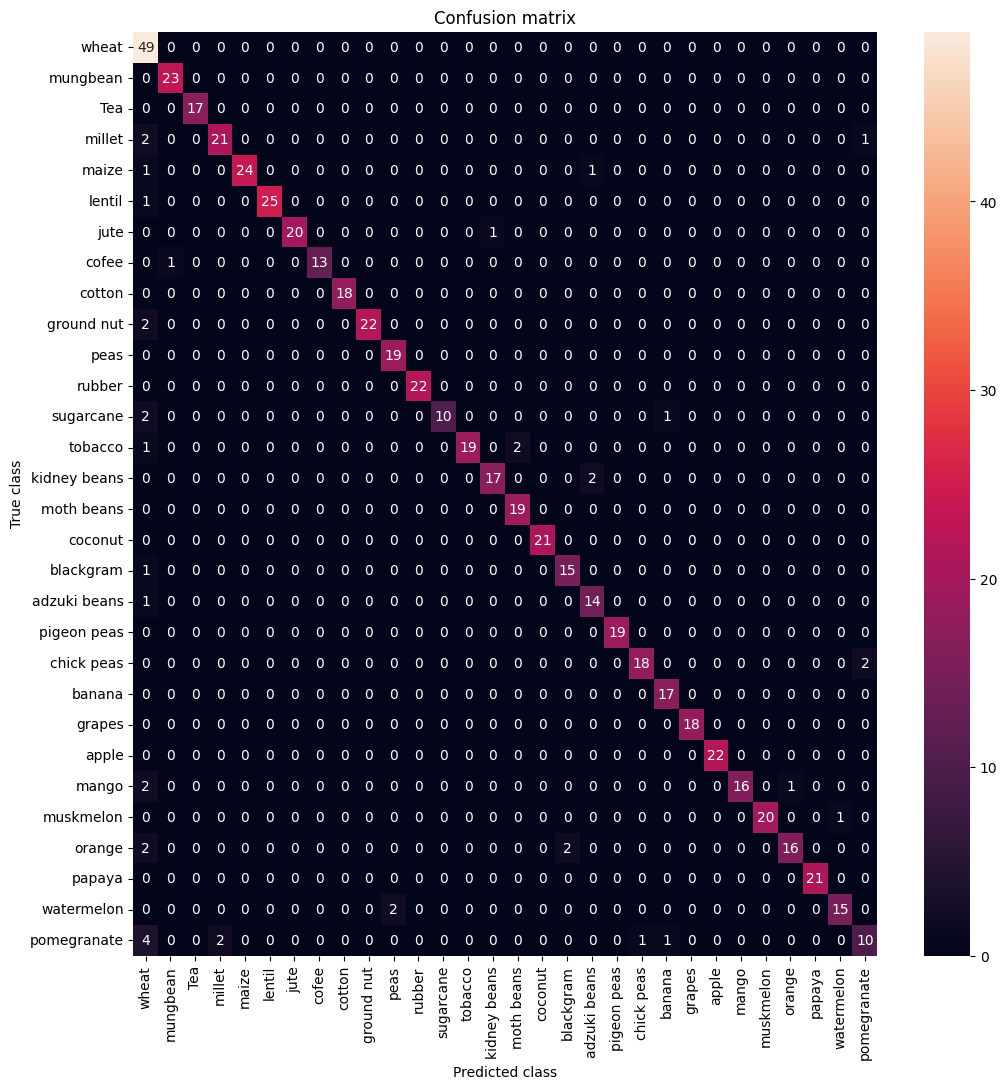

The accuracy of Random Classifier model is:  93.38709677419355
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gcloud: filename=gcloud-0.18.3-py3-none-any.whl size=602928 sha256=368c870605d1c13312341663dbe749433635bcf46a86c12182dcb58d56e309dc
  Stored in directory: /root/.cache/pip/wheels/7c/30/88/5017af921da3a33af785f0d0fd3e944b845bc62a445a2c2f69
Successfully built gcloud
  Preparing metadata (setup.py) ... done
  Created wheel for sseclient: filename=sseclient-0.0.27-py3-none-any.whl size=5563 sha256=175c6beaef40b874fe7e6fdf61394b4754fa46d87ed874a7f568c8073a29bdc1
  Stored in directory: /root/.cache/pip/wheels/60/57/0e/09b1264923280e935a34cc543b7f147f5df12490bd7a992f42
Successfully built sseclient
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp310-cp310-linux_x

SyntaxError: multiple exception types must be parenthesized (RSA.py, line 585)

In [ ]:

#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
import random
import seaborn as sns
import matplotlib.pyplot as plt

# drive.mount('/content/gdrive')
# #Reading the csv file
# data=pd.read_csv('gdrive/My Drive/cpdata.csv')
# print(data.head(1))

data=pd.read_csv('cpdata.csv')
print(data.head(1))

#Creating dummy variable for target i.e label
label= pd.get_dummies(data.label).iloc[: , 1:]
data= pd.concat([data,label],axis=1)
data.drop('label', axis=1,inplace=True)
print('The data present in one row of the dataset is')
print(data.head(1))
train=data.iloc[:, 0:4].values
test=data.iloc[: ,4:].values

#Dividing the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Importing Decision Tree classifier
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestClassifier
#Fitting the classifier into training set
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# predictions
yPred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
# Finding the accuracy of the model
a1=accuracy_score(y_test,yPred)
a=accuracy_score(y_test,pred)
print("The accuracy of Decision Classifie model is: ", a*100)

prec = precision_score(y_test, yPred, average='micro')
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred ,average='micro')
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred ,average='micro')
print("The F1-Score is {}".format(f1))



# printing the confusion matrix
LABELS = ['wheat','mungbean','Tea','millet','maize','lentil','jute','cofee','cotton','ground nut','peas','rubber','sugarcane','tobacco','kidney beans','moth beans','coconut','blackgram','adzuki beans','pigeon peas','chick peas','banana','grapes','apple','mango','muskmelon','orange','papaya','watermelon','pomegranate']
conf_matrix = confusion_matrix(y_test.argmax(axis=1), yPred.argmax(axis=1))
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print("The accuracy of Random Classifier model is: ", a1*100)
!pip3 install python-firebase
!pip3 install firebase
!pip install gcloud
!pip install sseclient
!pip install pycrypto
!pip install requests-toolbelt
!pip install python_jwt
#Using firebase to import data to be tested
from firebase import firebase
firebase =firebase.FirebaseApplication('https://kisanseva-ede4c.firebaseio.com/')
#tp=firebase.get('/Realtime',None)
#firebase.put('https://kisanseva-ede4c.firebaseio.com/Realtime/','Name','Bob')

tp = firebase.get('https://kisanseva-ede4c.firebaseio.com/Realtime', '')
print(tp);
ah=tp['Air Humidity']
atemp=tp['Air Temp']
shum=tp['Soil Humidity']
pH=tp['Soil pH']
rain=tp['Rainfall']


l=[]
l.append(ah)
l.append(atemp)
l.append(pH)
l.append(rain)
#firebase.put('/Realtime','Rainfall',l)
firebase.put('/Realtime','Air Humidity',ah)
firebase.put('/Realtime','Air Temp',atemp)
firebase.put('/Realtime','Soil Humidity',shum)
firebase.put('/Realtime','Soil pH',pH)
firebase.put('/Realtime','Rainfall',rain)
print('Record Updated')
predictcrop=[l]

# Putting the names of crop in a single list
crops=['wheat','mungbean','Tea','millet','maize','lentil','jute','cofee','cotton','ground nut','peas','rubber','sugarcane','tobacco','kidney beans','moth beans','coconut','blackgram','adzuki beans','pigeon peas','chick peas','banana','grapes','apple','mango','muskmelon','orange','papaya','watermelon','pomegranate']
cr='rice'

#Predicting the crop
# train_data_x = [[ah,atemp,shum,pH,rain]]
# train_data_y = [crops]
# clf.fit(train_data_x,train_data_y);
predictions = clf.predict(predictcrop)
print(predictions)
count=0
mylist = []
for i in range(0,30):
    print(predictions[0][i])
    if(predictions[0][i]==1):
        c=crops[i]
        count=count+1
       # break;
    else:
      mylist.append(crops[i]);
    i=i+1
if(count==0):
    print('The predicted crop is %s'%cr)
else:
    myRes = random.choice(mylist)
    print('The predicted crop is %s'%myRes)

#Sending the predicted crop to database
cp=firebase.put('/croppredicted','crop',myRes)
import tensorflow as tf

# Create a model using high-level tf.keras.* APIs
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='sgd', loss='mean_squared_error') # compile the model
model.fit(x=[-1, 0, 1], y=[-3, -1, 1], epochs=5) # train the model
# (to generate a SavedModel) tf.saved_model.save(model, "saved_model_keras_dir")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('croppredictor.tflite', 'wb') as f:
  f.write(tflite_model)